## Names : Sangamesh
## Mail id : sangupatil648@gmail.com

## Assignment-Neural Networks-Gas turbines data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
 
import warnings
warnings.filterwarnings("ignore")

In [2]:
gas = pd.read_csv("gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
gas.shape

(15039, 11)

In [4]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


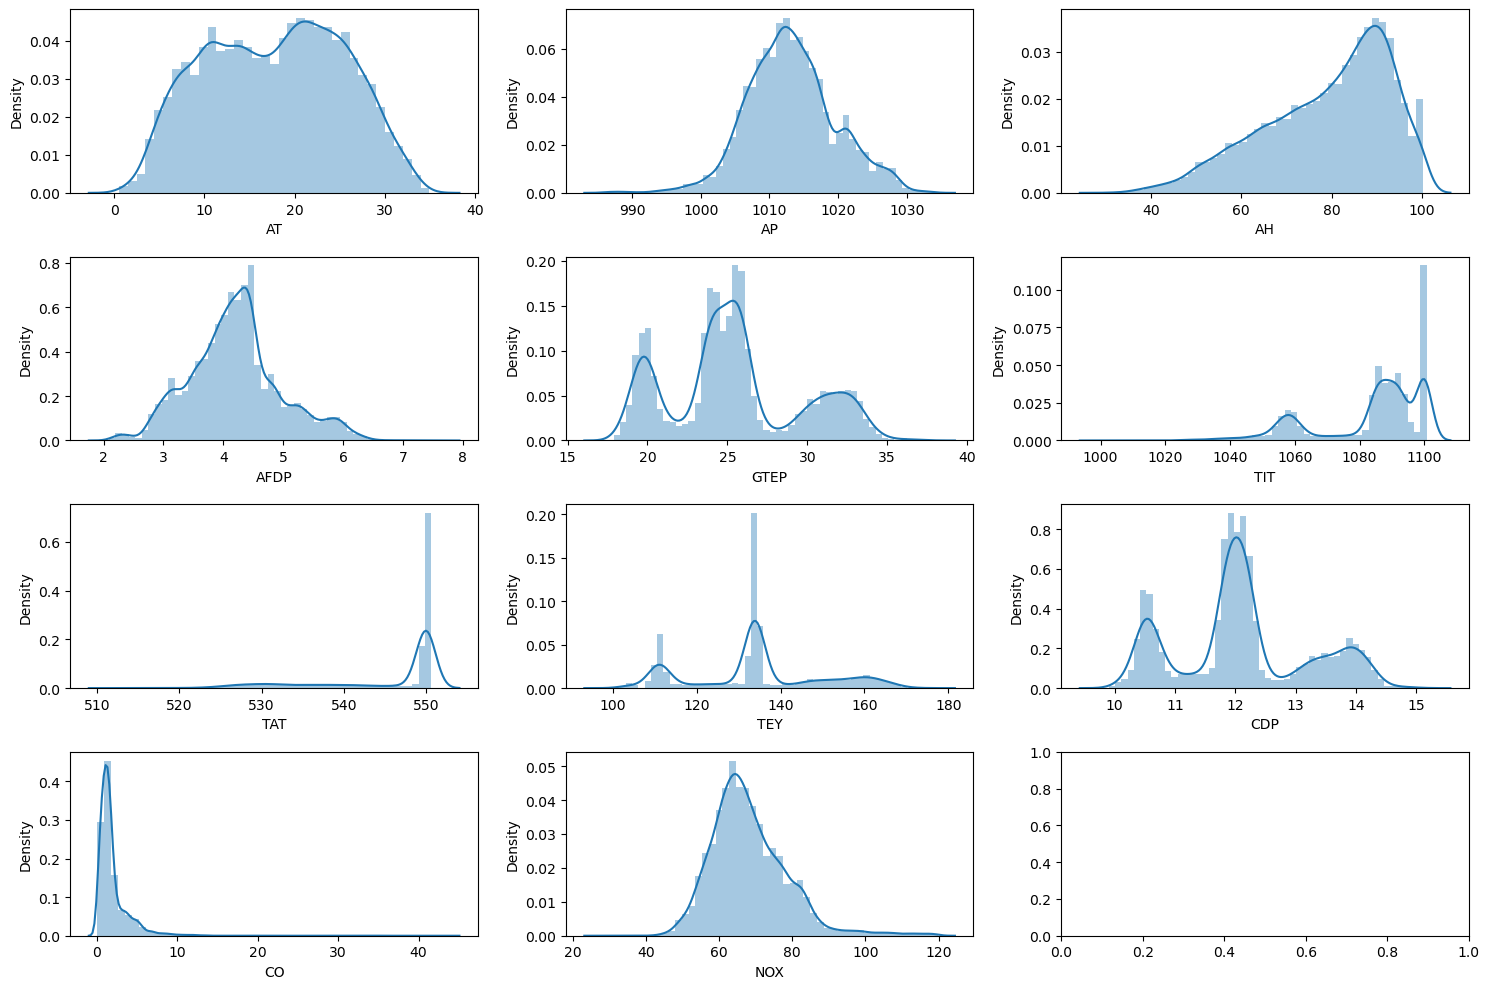

In [7]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(gas.AT, ax=ax[0,0])
sns.distplot(gas.AP, ax=ax[0,1])
sns.distplot(gas.AH, ax=ax[0,2])
sns.distplot(gas.AFDP, ax=ax[1,0])
sns.distplot(gas.GTEP, ax=ax[1,1])
sns.distplot(gas.TIT, ax=ax[1,2])
sns.distplot(gas.TAT, ax=ax[2,0])
sns.distplot(gas.TEY, ax=ax[2,1])
sns.distplot(gas.CDP, ax=ax[2,2])
sns.distplot(gas.CO, ax=ax[3,0])
sns.distplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

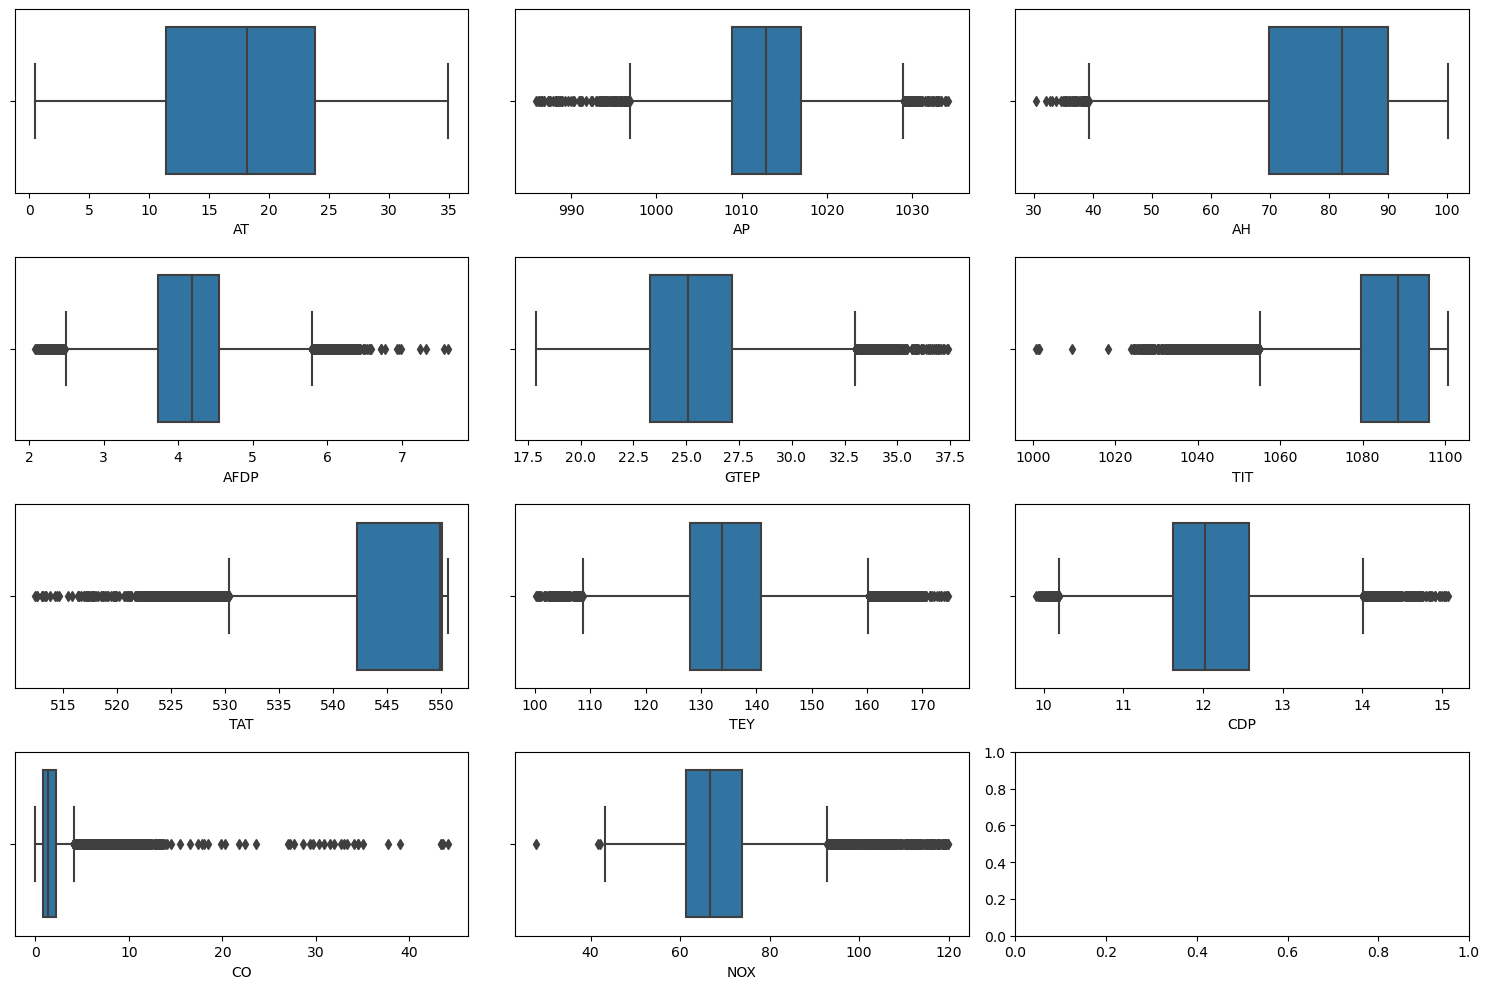

In [8]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(gas.AT, ax=ax[0,0])
sns.boxplot(gas.AP, ax=ax[0,1])
sns.boxplot(gas.AH, ax=ax[0,2])
sns.boxplot(gas.AFDP, ax=ax[1,0])
sns.boxplot(gas.GTEP, ax=ax[1,1])
sns.boxplot(gas.TIT, ax=ax[1,2])
sns.boxplot(gas.TAT, ax=ax[2,0])
sns.boxplot(gas.TEY, ax=ax[2,1])
sns.boxplot(gas.CDP, ax=ax[2,2])
sns.boxplot(gas.CO, ax=ax[3,0])
sns.boxplot(gas.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
gas1 = pd.DataFrame(scale.fit_transform(gas),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
gas1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [10]:
X = gas1.drop(axis=0,columns="TEY").values
Y = gas1["TEY"].values

In [11]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [12]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [13]:
seed = 69
np.random.seed(seed)

In [14]:
model = Sequential()
model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [15]:
model.compile(loss = 'mse', optimizer='adam', metrics=['accuracy'])

In [16]:
model.fit(X, Y, validation_split=0.30, epochs=100, batch_size=10)

Epoch 1/100
1053/1053 [==============================] - 4s 3ms/step - loss: 0.0262 - accuracy: 9.4994e-05 - val_loss: 4.9344e-04 - val_accuracy: 2.2163e-04
Epoch 2/100
1053/1053 [==============================] - 3s 2ms/step - loss: 3.8836e-04 - accuracy: 9.4994e-05 - val_loss: 2.3410e-04 - val_accuracy: 2.2163e-04
Epoch 3/100
1053/1053 [==============================] - 2s 2ms/step - loss: 1.8943e-04 - accuracy: 9.4994e-05 - val_loss: 1.8757e-04 - val_accuracy: 2.2163e-04
Epoch 4/100
1053/1053 [==============================] - 3s 2ms/step - loss: 1.4938e-04 - accuracy: 9.4994e-05 - val_loss: 1.4615e-04 - val_accuracy: 2.2163e-04
Epoch 5/100
1053/1053 [==============================] - 2s 2ms/step - loss: 1.3666e-04 - accuracy: 9.4994e-05 - val_loss: 1.2024e-04 - val_accuracy: 2.2163e-04
Epoch 6/100
1053/1053 [==============================] - 2s 2ms/step - loss: 1.2987e-04 - accuracy: 9.4994e-05 - val_loss: 1.1685e-04 - val_accuracy: 2.2163e-04
Epoch 7/100
1053/1053 [===============

In [17]:
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 2ms/step - loss: 1.3126e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [18]:
history = model.fit(X,Y, validation_split = 0.33, epochs=100, batch_size = 10)

Epoch 1/100
1008/1008 [==============================] - 4s 4ms/step - loss: 1.0071e-04 - accuracy: 9.9246e-05 - val_loss: 1.0982e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 9.8805e-05 - accuracy: 9.9246e-05 - val_loss: 1.0041e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 4s 4ms/step - loss: 9.7510e-05 - accuracy: 9.9246e-05 - val_loss: 9.9182e-05 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 4s 4ms/step - loss: 9.8629e-05 - accuracy: 9.9246e-05 - val_loss: 9.3222e-05 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 1.0347e-04 - accuracy: 9.9246e-05 - val_loss: 9.7866e-05 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 9.8529e-05 - accuracy: 9.9246e-05 - val_loss: 9.3660e-05 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

In [19]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

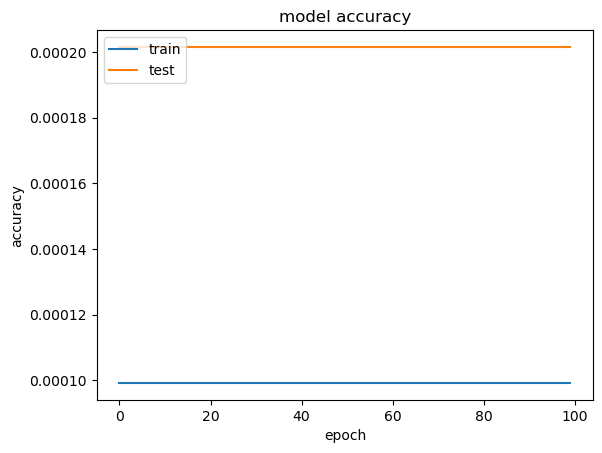

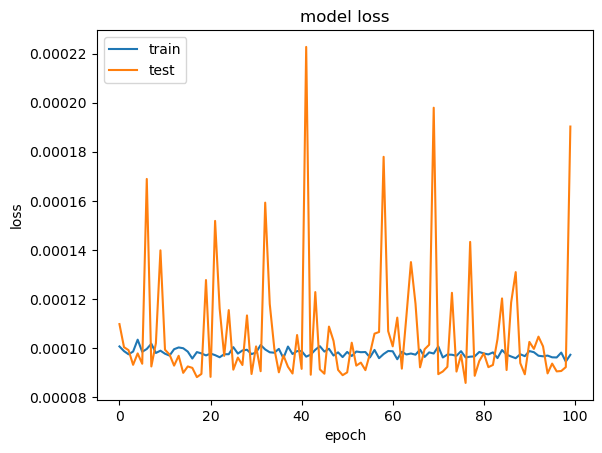

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()